In [1]:
import zipfile
import os

# Unzipping the file
zipped_file_path = 'C:/Users/HP/Downloads/netflix_data'

# Directory where the unzipped file is extracted to
extraction_directory = 'C:/Users/HP/Downloads/netflix_extracted'

# Create the extraction directory
os.makedirs(extraction_directory, exist_ok=True)

try:
    with zipfile.ZipFile(zipped_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_directory)
    print(f"'{zipped_file_path}' successfully unzipped to '{extraction_directory}'.")
except FileNotFoundError:
    print(f"Error: The file '{zipped_file_path}' was not found.")
except zipfile.BadZipFile:
    print(f"Error: '{zipped_file_path}' is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: The file 'C:/Users/HP/Downloads/netflix_data' was not found.


In [5]:
# The error message observed is because the file on download from the assignment portal was a csv file and not a zipped file. 
# So I will go ahead to import the file.

import pandas as pd # Program/Library: pandas

# Load the dataset
df_raw = pd.read_csv('netflix_data.csv')

# Rename the DataFrame as requested in the assisgnment
Netflix_shows_movies = df_raw.copy()

print("Dataset loaded and DataFrame renamed to 'Netflix_shows_movies'.")
print(f"Initial shape of the dataset: {Netflix_shows_movies.shape}")
print("\nFirst 5 rows of the dataset:")
print(Netflix_shows_movies.head())


Dataset loaded and DataFrame renamed to 'Netflix_shows_movies'.
Initial shape of the dataset: (6234, 12)

First 5 rows of the dataset:
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nest

In [7]:
# Conducting data cleaning to address missing values.

print("--- Data Cleaning: Handling Missing Values ---")

# Checking for missing values before cleaning
print("\nMissing values before cleaning:")
print(Netflix_shows_movies.isnull().sum())

# Fill missing values in 'director' and 'cast' with 'Unknown', using 'unknown' is impoirtant to retain valuable data to facilitate a robust analysis.
# The director column had about 2,000 missing data, if dropped will have a significant impact in data for analysis and results from our analytics.

Netflix_shows_movies['director'].fillna('Unknown', inplace=True)
Netflix_shows_movies['cast'].fillna('Unknown', inplace=True)

# Fill missing values in 'country', 'rating', 'duration' with their respective modes
# Using modes is the most appropriate central tendency measure for categorical (nominal or ordinal) data.
# By filling missing data with the mode, we retain the rows and thus more data points for our analysis, rather than dropping rows that may lead to significant loss of data for analysis.
# Especially in the country column which had 476 missing data.

for column in ['country', 'rating', 'duration']:
    if Netflix_shows_movies[column].isnull().any():
        mode_value = Netflix_shows_movies[column].mode()[0]
        Netflix_shows_movies[column].fillna(mode_value, inplace=True)

# Convert 'date_added' to datetime and fill NaT(not a number values for datetime) values (if any) with the mode.
# Then drop remaining NaNs(not a number values) from conversion issues
Netflix_shows_movies['date_added'] = pd.to_datetime(Netflix_shows_movies['date_added'], errors='coerce')
if Netflix_shows_movies['date_added'].isnull().any():
    # If there are NaT values after coerce, fill them with the mode of valid dates to ensure data is complete for analysis.
    mode_date = Netflix_shows_movies['date_added'].mode()[0]
    Netflix_shows_movies['date_added'].fillna(mode_date, inplace=True)
    # Re-check for any remaining NaNs after filling
    Netflix_shows_movies.dropna(subset=['date_added'], inplace=True)


# Verify missing values after cleaning
print("\nMissing values after cleaning:")
print(Netflix_shows_movies.isnull().sum())

print("\nData cleaning complete.")


--- Data Cleaning: Handling Missing Values ---

Missing values before cleaning:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data cleaning complete.


In [11]:
# Conducting data exploration.

print("--- Data Exploration ---")

# Descriptive statistics for all columns
print("\nDescriptive statistics for the dataset:")
print(Netflix_shows_movies.describe(include='all'))

# Count of 'type' (Movie vs TV Show)
print("\nCounts of 'type' (Movies vs. TV Shows):")
print(Netflix_shows_movies['type'].value_counts())

# Distribution of 'rating'
print("\nDistribution of 'rating':")
print(Netflix_shows_movies['rating'].value_counts())

# Extract year from 'date_added' for time-based analysis
Netflix_shows_movies['year_added'] = Netflix_shows_movies['date_added'].dt.year
print("\nNew 'year_added' column created.")
print(Netflix_shows_movies[['date_added', 'year_added']].head())

# Country Distribution by Count ---
print("\n--- Country Distribution by Count ---")
country_counts = Netflix_shows_movies['country'].value_counts()
print(country_counts.head(10)) # Display top 10 countries by content count

# Country with the Newest Releases ---
print("\n--- Country with the Newest Releases ---")

# Find the maximum year in 'year_added' across the entire dataset
max_year_added = Netflix_shows_movies['year_added'].max()
print(f"The newest release year in the dataset is: {int(max_year_added)}")

# Filter the DataFrame to include only titles from the newest release year
newest_releases = Netflix_shows_movies[Netflix_shows_movies['year_added'] == max_year_added]

# Get the count of titles per country for the newest releases
countries_newest_releases = newest_releases['country'].value_counts().reset_index()
countries_newest_releases.columns = ['Country', 'Number_of_New_Releases']

print("\nCountries with titles released in the newest year:")
print(countries_newest_releases.head(10)) # Display top 10 countries for newest releases

# Ratings Distribution for Newest Releases by Country ---
print("\n--- Ratings Distribution for Newest Releases by Country ---")

# For the newest releases, for the ratings distribution by country
# First, we identify the top countries in the newest releases for a clearer view andunderstanding
top_countries_in_newest_releases = countries_newest_releases['Country'].head(5).tolist()

# Filter newest_releases for these top countries
newest_releases_top_countries = newest_releases[newest_releases['country'].isin(top_countries_in_newest_releases)]

# Grouping by country and rating to see the distribution
ratings_by_country_newest = newest_releases_top_countries.groupby(['country', 'rating']).size().unstack(fill_value=0)

print(f"\nRatings distribution for newest releases ({int(max_year_added)}) by top countries:")
print(ratings_by_country_newest)

print("\nData exploration complete.")

--- Data Exploration ---

Descriptive statistics for the dataset:
             show_id   type        title director     cast        country  \
count   6.234000e+03   6234         6234     6234     6234           6234   
unique           NaN      2         6172     3302     5470            554   
top              NaN  Movie  The Silence  Unknown  Unknown  United States   
freq             NaN   4265            3     1969      570           2508   
mean    7.670368e+07    NaN          NaN      NaN      NaN            NaN   
min     2.477470e+05    NaN          NaN      NaN      NaN            NaN   
25%     8.003580e+07    NaN          NaN      NaN      NaN            NaN   
50%     8.016337e+07    NaN          NaN      NaN      NaN            NaN   
75%     8.024489e+07    NaN          NaN      NaN      NaN            NaN   
max     8.123573e+07    NaN          NaN      NaN      NaN            NaN   
std     1.094296e+07    NaN          NaN      NaN      NaN            NaN   

         

--- Data Visualization ---

Generating 'Most Watched Genres' visualization...


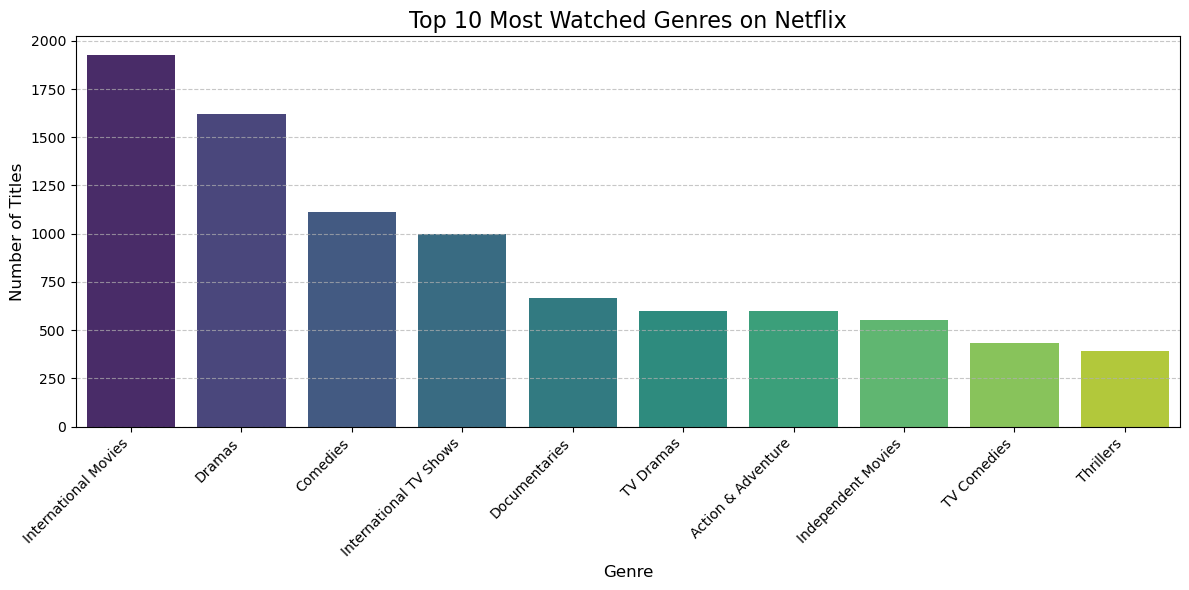

 'Most Watched Genres' visualization displayed.

Generating 'Ratings Distribution' visualization...


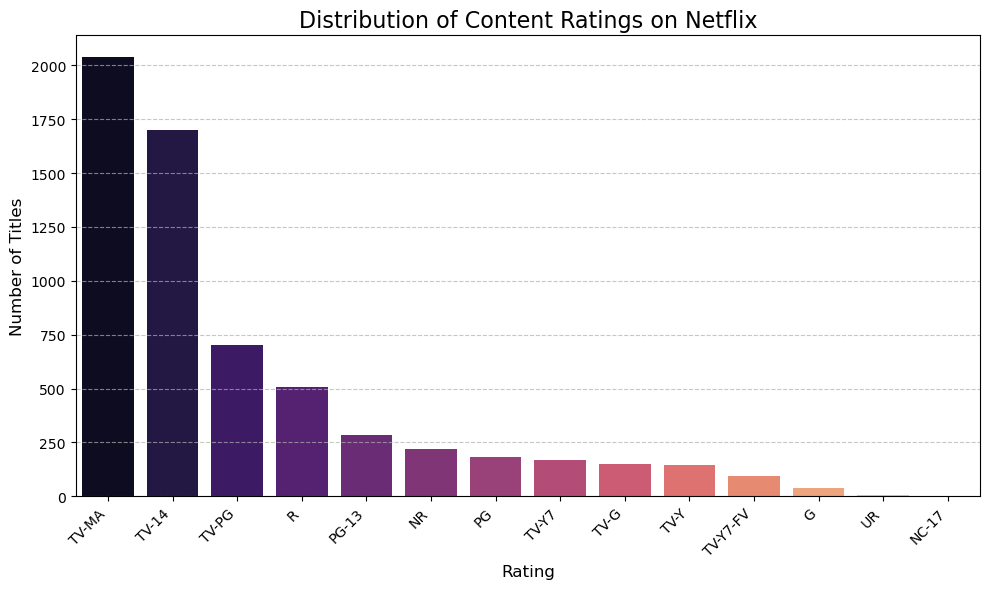

 'Ratings Distribution' visualization displayed.

Data visualization complete.


In [13]:
# Data visualization for most watched genre and ratings distribution.

import matplotlib.pyplot as plt # Program/Library: matplotlib.pyplot
import seaborn as sns           # Program/Library: seaborn
import pandas as pd             # Program/Library: pandas (already imported, but good to list again for this section)

print("--- Data Visualization ---")

# --- Visualization 1: Most Watched Genres ---
print("\nGenerating 'Most Watched Genres' visualization...")

# The 'listed_in' column contains comma-separated genres.
# We need to split them and count individual genres.
genres = Netflix_shows_movies['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print(" 'Most Watched Genres' visualization displayed.")


# --- Visualization 2: Ratings Distribution ---
print("\nGenerating 'Ratings Distribution' visualization...")

plt.figure(figsize=(10, 6))
# Order the bars by frequency of the ratings
sns.countplot(data=Netflix_shows_movies, x='rating',
              order=Netflix_shows_movies['rating'].value_counts().index,
              palette='magma')
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout
plt.show()
print(" 'Ratings Distribution' visualization displayed.")

print("\nData visualization complete.")